In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from flask import Flask, jsonify

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [9]:
# Calculate the date 1 year ago from today
todaydate = datetime.now()
oneyearback = todaydate.replace(year=todaydate.year-1).strftime("%Y-%m-%d")
oneyearback

'2017-08-28'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').all()

# I would like to use this too but the where statement fails to filter the results
# dataM = pd.read_sql("SELECT * FROM measurement WHERE date > 2016-08-23 ORDER BY date", conn)
# dataS = pd.read_sql("SELECT * FROM station", conn)


[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [11]:
data = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').all())
data.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [12]:
data.set_index("date", inplace=True)
data.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


<IPython.core.display.Javascript object>


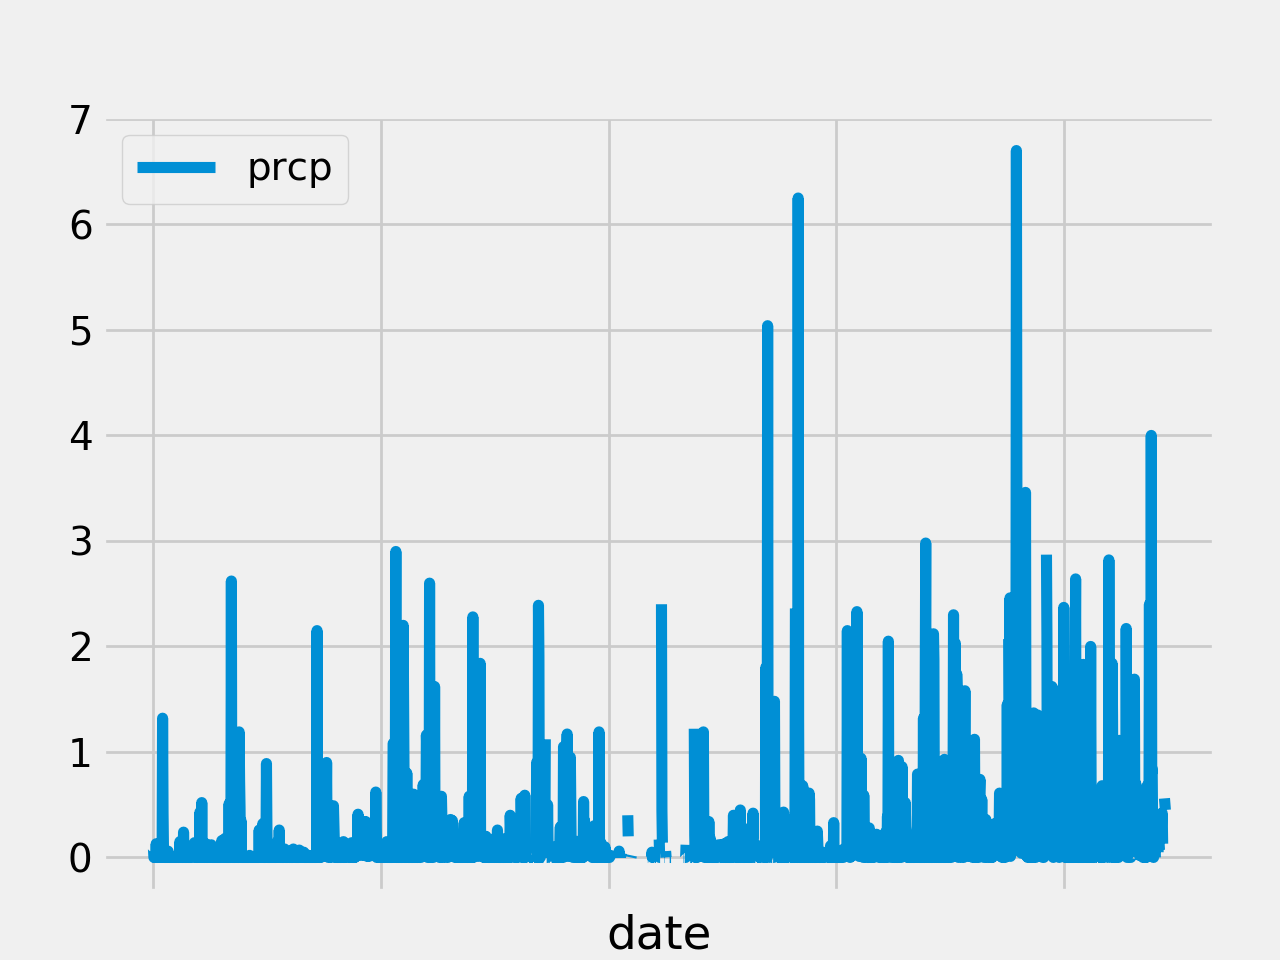

In [13]:
data.plot()

In [19]:
print(data.columns)
print(type(data))
data.describe()

Index(['prcp'], dtype='object')
<class 'pandas.core.frame.DataFrame'>


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:

# How many stations are available in this dataset?
len(session.query(Station.station).all())

9

In [22]:
# get information on the tables
inspector = inspect(engine)
print(inspector.get_table_names())
print( )
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
print( )
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

['measurement', 'station']

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
# What are the most active stations?
# List the stations and the counts in descending order.
dataM = pd.read_sql("SELECT Measurement.station, COUNT(Measurement.station) FROM Measurement GROUP BY Measurement.station ORDER BY COUNT(Measurement.station) DESC", conn)
dataM

,station,COUNT(Measurement.station)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [24]:
# query the max, min, and avg of the most active weather station
func_vals = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
func_vals



[(54.0, 85.0, 71.66378066378067)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# temp_hist_data = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date > '2016-08-23').all()
temp_hist_data = pd.DataFrame(session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date > '2016-08-23').all())
temp_hist_data.head()

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


<IPython.core.display.Javascript object>


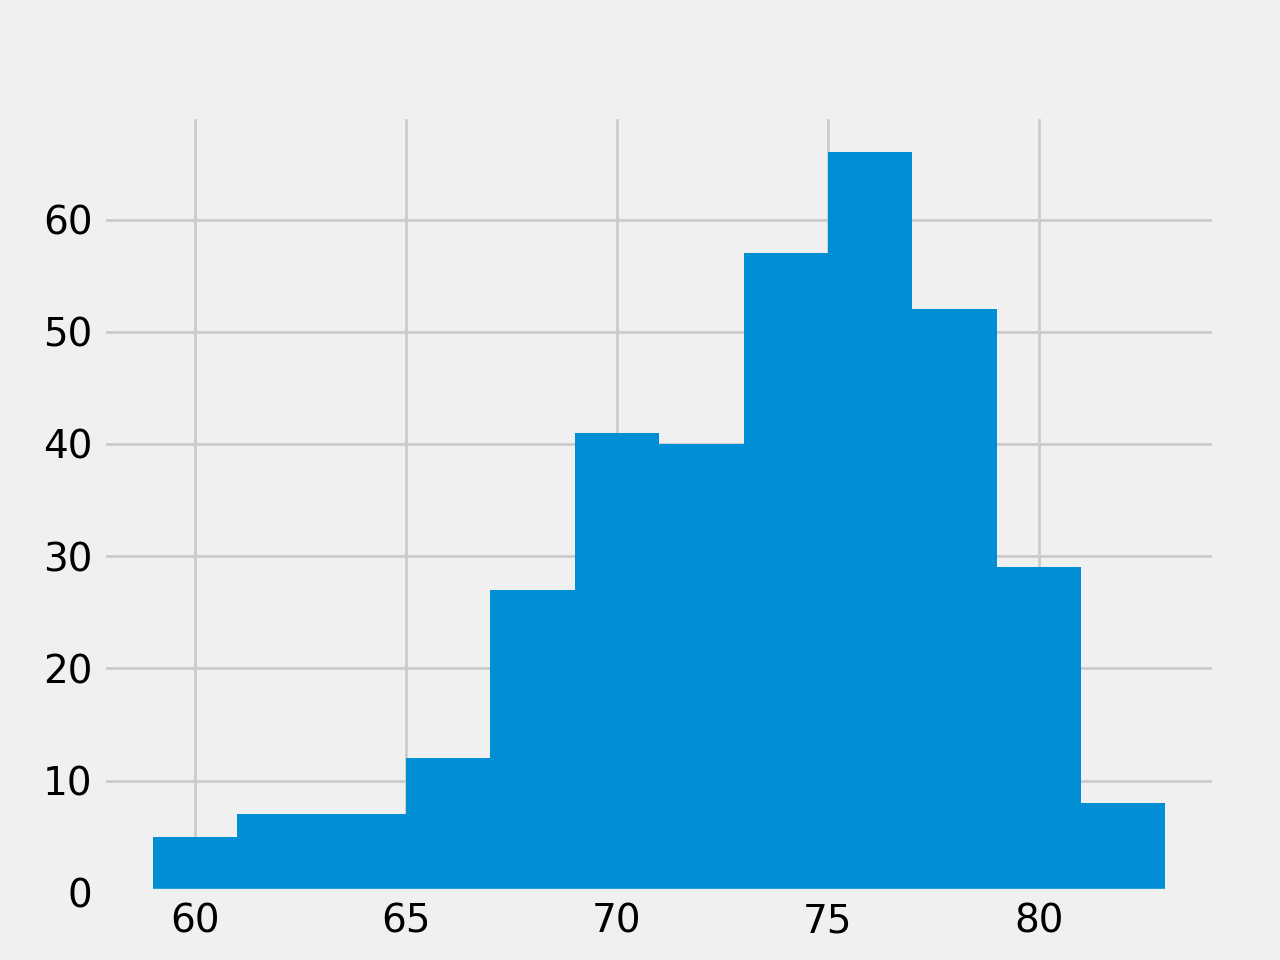

(array([  5.,   7.,   7.,  12.,  27.,  41.,  40.,  57.,  66.,  52.,  29.,
          8.]),
 array([ 59.,  61.,  63.,  65.,  67.,  69.,  71.,  73.,  75.,  77.,  79.,
         81.,  83.]),
 <a list of 12 Patch objects>)

In [28]:
plt.figure()
plt.hist(temp_hist_data['tobs'], bins=12)